In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

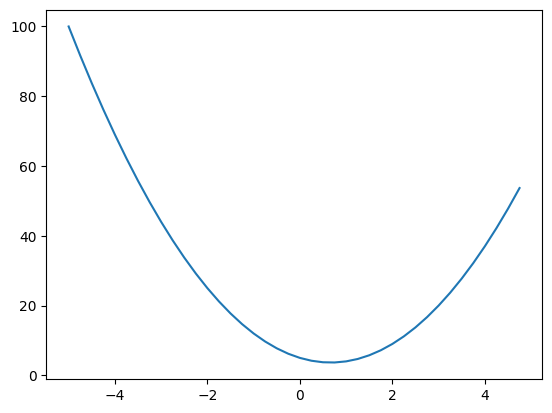

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Easy problem

In [5]:
h = 0.0000000000001
x = 3.0

(f(x+h) - f(x-h)) / (h)

27.995383788947947

In [6]:
h = 0.0000000000001
x = 2/3

(f(x+h) - f(x-h)) / (h)

-0.004440892098500626

Slightly Complex problem

In [59]:
h = 0.0001

# inputs
a = 0.2
b = -3.0
c = 10.0

In [60]:
d1 = a*b + c
d1

9.4

In [61]:
.2 *  -3

-0.6000000000000001

In [62]:
a += h
a

0.2001

In [63]:
d2 = a*b + c
d2

9.3997

In [64]:
print("d1", d1)
print("d2", d2)
print("slope", (d2 - d1)/h)

d1 9.4
d2 9.3997
slope -3.000000000010772


Now we have intuitive idea behind derivative, lets jump in to NN.

In [65]:
class Value:

    def __init__(self, data):
        self.data = data
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out

In [66]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a*b + c

Value(data=4.0)

In [2]:
class Value:

    def __init__(self, data, _childern=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_childern)
        self._op = _op    
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        
        out._backward = _backward

        return out

In [143]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [144]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [157]:
L.grad = 1.0; L.label = 'L'
f.grad = 4.0; f.label = 'f'
d.grad = -2.0; d.label = 'd'
c.grad = -2.0; c.label = 'c'
e.grad = -2.0; e.label = 'e'
a.grad = 6; a.label = 'a'
b.grad = -4; b.label = 'b'

In [148]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b 
d = e + c
L = d * f

print(L.data)

-8.0


In [149]:
def lol():

    h  = 0.00001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 , label='a')
    # a.data += h
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    # e.data += h
    d = e + c; d.label = 'd'
    # d.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    # print(L2)
    # print(L1)
    print((L2 - L1)/h)

In [150]:
lol()

-4.000000000026205


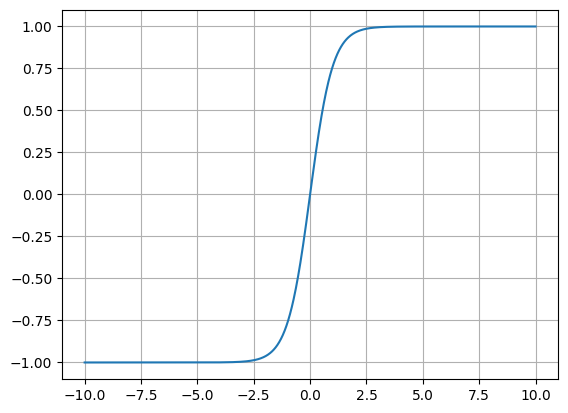

In [151]:
## Activation Function - tanh
x = np.linspace(-10, 10, 1000)
plt.plot(x, np.tanh(x))
plt.grid()
plt.show()

In [4]:
#inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias b
b = Value(6.8813735870195432, label='b')

#x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [177]:
# o.grad = 1.0; o.label = 'o'
# n.grad = 0.5; n.label = 'n'
# b.grad = 0.5; b.label = 'b'
# x1w1x2w2.grad = 0.5; x1w1x2w2.label = 'x1w1 + x2w2'
# x1w1.grad = 0.5; x1w1.label = 'x1w1'
# x2w2.grad = 0.5; x2w2.label = 'x2w2'


In [178]:
# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad

# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad

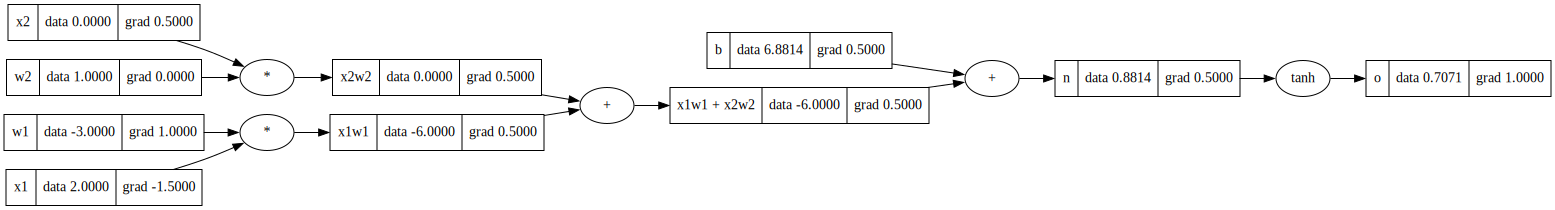

In [7]:
draw_dot(o)

In [6]:
# start with o.grad
# o.grad = 1.0
# o._backward()
# n._backward()
# b._backward()
# x1w1x2w2._backward()
# x2w2._backward()
# x1w1._backward()

In [1]:
from value import Value
from visualize import draw_dot

In [3]:
#inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias b
b = Value(6.8813735870195432, label='b')

#x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

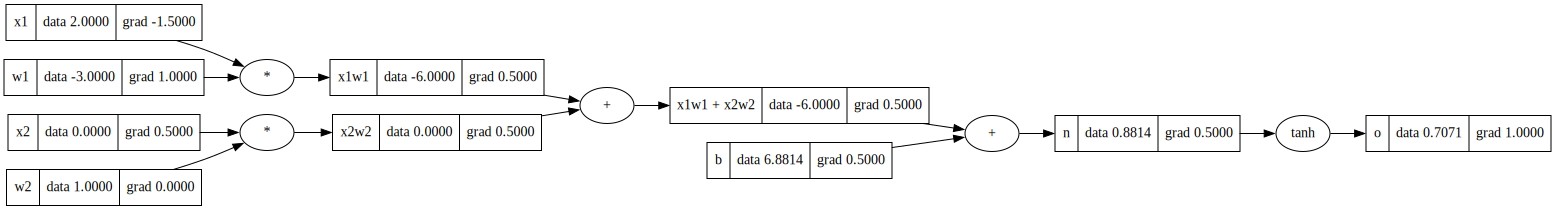

In [6]:
draw_dot(o)

In [5]:
o.backward()